In [1]:
#!pip install ucimlrepo
#!pip install matplotlib
#!pip install pandas
#!pip install ydata-profiling
#!pip install scikit-learn 
from ucimlrepo import fetch_ucirepo 

# adultというUCIのデータは15項目48842のデータがあり、年齢等14項目のデータから収入が50K以上稼いでいるかを判定する。
adult = fetch_ucirepo(id=2) 

#データ形式はPandasである。
d1=adult.data.features  #収入以外の14項目
d2=adult.data.targets   #収入

In [2]:
#学習データをグラフ化する。一部の列は欠損があり、それらの列は除く。
a=d1.loc[:,["age","fnlwgt","education","education-num","marital-status","sex","capital-gain","capital-loss","hours-per-week"]]
#収入とその他のデータを後で分けることで、同じindex(解答者)から取ってこれる。
a['income']=d2

In [3]:
#incomeは<=50kを0、>50kを1とおく。sexは0男性,1女性とおく。
#educationについて、Bachelors以上(Bachelors,Prof-school,Doctorate,Masters)を1それ以外を0。
#marital-statusについてはmarried関係(-AF-,-civ-)を1それ以外を0とした。
for i in range(48842):
    if a.at[i,"sex"]=="Female":
        a.at[i,"sex"]=0
    else:
        a.at[i,"sex"]=1
    if a.at[i,"income"]=="<=50K":
        a.at[i,"income"]=0
    else:
        a.at[i,"income"]=1 
    if a.at[i,"education"] in ['Bachelors','MAster','Doctorate','Prof-school']:
        a.at[i,"education"]=1
    else:
        a.at[i,"education"]=0
    if a.at[i,"marital-status"] in ['Married-AF-spouse','Married-civ-spouse']:
        a.at[i,"marital-status"]=1
    else:
        a.at[i,"marital-status"]=0
a["sex"]=a["sex"].astype(int)
a["income"]=a["income"].astype(int)
a["education"]=a["education"].astype(int)
a["marital-status"]=a["marital-status"].astype(int)#int型にしないと後で困る可能性がある。

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2953353295.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_age[1]=a[a['age']>20][a['age']<=30]['age'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2953353295.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_age[2]=a[a['age']>30][a['age']<=40]['age'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2953353295.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_age[3]=a[a['age']>40][a['age']<=50]['age'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2953353295.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_age[4]=a[a['age']>50][a['age']<=60]['age'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2953353295.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_age0[0]=a[a['age']<=20][a['income']==0]['age'].count()
C:\Us

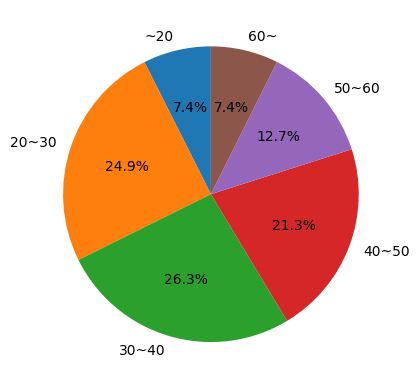

In [5]:
g_age=np.array([0,0,0,0,0,0])
#年齢を区間で分け、人数をカウントし、円グラフにする。
g_age[0]=a[a['age']<=20]['age'].count()
g_age[1]=a[a['age']>20][a['age']<=30]['age'].count()
g_age[2]=a[a['age']>30][a['age']<=40]['age'].count()
g_age[3]=a[a['age']>40][a['age']<=50]['age'].count()
g_age[4]=a[a['age']>50][a['age']<=60]['age'].count()
g_age[5]=a[a['age']>60]['age'].count()
age_label=["~20","20~30","30~40","40~50","50~60","60~"]
plt.pie(g_age,labels=age_label,startangle=90,autopct="%1.1f%%")
plt.savefig('age_en.jpg')#これによってグラフ化,エラーはグラフ作成のみに用いる今回は無視してかまわない。
#年齢と、収入が<=50kかどうかで区間分けし、人数をカウントし、円グラフにする。
g_age0=np.array([0,0,0,0,0,0])
g_age1=np.array([0,0,0,0,0,0])
g_age0[0]=a[a['age']<=20][a['income']==0]['age'].count()
g_age0[1]=a[a['age']>20][a['age']<=30][a['income']==0]['age'].count()
g_age0[2]=a[a['age']>30][a['age']<=40][a['income']==0]['age'].count()
g_age0[3]=a[a['age']>40][a['age']<=50][a['income']==0]['age'].count()
g_age0[4]=a[a['age']>50][a['age']<=60][a['income']==0]['age'].count()
g_age0[5]=a[a['age']>60][a['income']==0]['age'].count()
g_age1[0]=a[a['age']<=20][a['income']==1]['age'].count()
g_age1[1]=a[a['age']>20][a['age']<=30][a['income']==1]['age'].count()
g_age1[2]=a[a['age']>30][a['age']<=40][a['income']==1]['age'].count()
g_age1[3]=a[a['age']>40][a['age']<=50][a['income']==1]['age'].count()
g_age1[4]=a[a['age']>50][a['age']<=60][a['income']==1]['age'].count()
g_age1[5]=a[a['age']>60][a['income']==1]['age'].count()

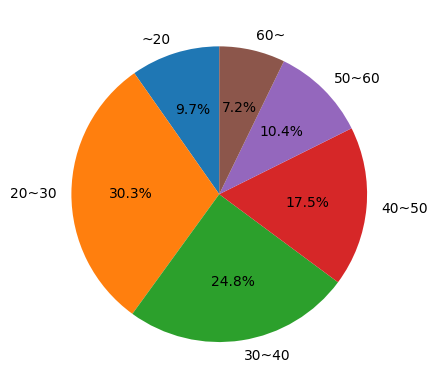

In [6]:
plt.pie(g_age0,labels=age_label,startangle=90,autopct="%1.1f%%")
plt.savefig('age_en0.jpg')#これによってグラフ化,これは、収入<=50のデータ。

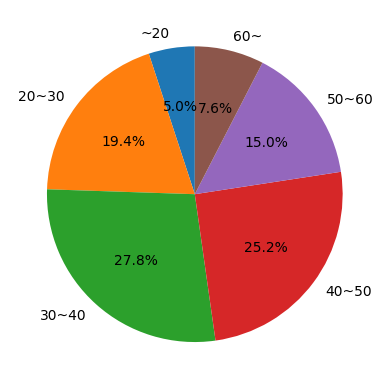

In [7]:
plt.pie(g_age1,labels=age_label,startangle=90,autopct="%1.1f%%")
plt.savefig('age_en1.jpg')#これによってグラフ化、これは、収入>50のデータ。

C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2267295295.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_fnl[1]=a[a['fnlwgt']>s][a['fnlwgt']<=b]['fnlwgt'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2267295295.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_fnl[2]=a[a['fnlwgt']>b][a['fnlwgt']<=c]['fnlwgt'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2267295295.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_fnl[3]=a[a['fnlwgt']>c][a['fnlwgt']<=d]['fnlwgt'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2267295295.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_fnl[4]=a[a['fnlwgt']>d][a['fnlwgt']<=e]['fnlwgt'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2267295295.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_fnl0[0]=a[a['fnlwgt']<=s][a['i

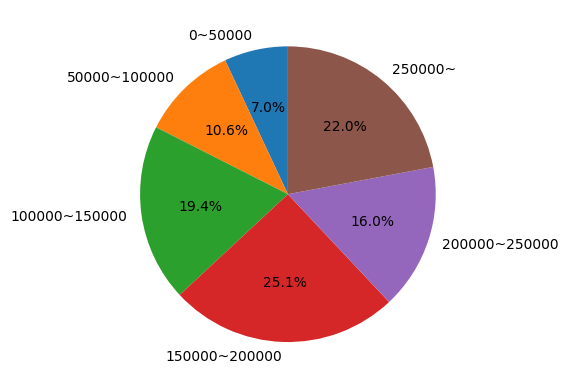

In [8]:
g_fnl=np.array([0,0,0,0,0,0])
s=50000
b=100000
c=150000
d=200000
e=250000
g_fnl[0]=a[a['fnlwgt']<=s]['fnlwgt'].count()
g_fnl[1]=a[a['fnlwgt']>s][a['fnlwgt']<=b]['fnlwgt'].count()
g_fnl[2]=a[a['fnlwgt']>b][a['fnlwgt']<=c]['fnlwgt'].count()
g_fnl[3]=a[a['fnlwgt']>c][a['fnlwgt']<=d]['fnlwgt'].count()
g_fnl[4]=a[a['fnlwgt']>d][a['fnlwgt']<=e]['fnlwgt'].count()
g_fnl[5]=a[a['fnlwgt']>e]['fnlwgt'].count()
fnl_label=["0~50000","50000~100000","100000~150000","150000~200000","200000~250000","250000~"]
plt.pie(g_fnl,labels=fnl_label,startangle=90,autopct="%1.1f%%")
plt.savefig('fnl_en.jpg')#これによってグラフ化
g_fnl0=np.array([0,0,0,0,0,0])
g_fnl0[0]=a[a['fnlwgt']<=s][a['income']==0]['fnlwgt'].count()
g_fnl0[1]=a[a['fnlwgt']>s][a['fnlwgt']<=b][a['income']==0]['fnlwgt'].count()
g_fnl0[2]=a[a['fnlwgt']>b][a['fnlwgt']<=c][a['income']==0]['fnlwgt'].count()
g_fnl0[3]=a[a['fnlwgt']>c][a['fnlwgt']<=d][a['income']==0]['fnlwgt'].count()
g_fnl0[4]=a[a['fnlwgt']>d][a['fnlwgt']<=e][a['income']==0]['fnlwgt'].count()
g_fnl0[5]=a[a['fnlwgt']>e][a['income']==0]['fnlwgt'].count()
g_fnl1=np.array([0,0,0,0,0,0])
g_fnl1[0]=a[a['fnlwgt']<=s][a['income']==1]['fnlwgt'].count()
g_fnl1[1]=a[a['fnlwgt']>s][a['fnlwgt']<=b][a['income']==1]['fnlwgt'].count()
g_fnl1[2]=a[a['fnlwgt']>b][a['fnlwgt']<=c][a['income']==1]['fnlwgt'].count()
g_fnl1[3]=a[a['fnlwgt']>c][a['fnlwgt']<=d][a['income']==1]['fnlwgt'].count()
g_fnl1[4]=a[a['fnlwgt']>d][a['fnlwgt']<=e][a['income']==1]['fnlwgt'].count()
g_fnl1[5]=a[a['fnlwgt']>e][a['income']==1]['fnlwgt'].count()

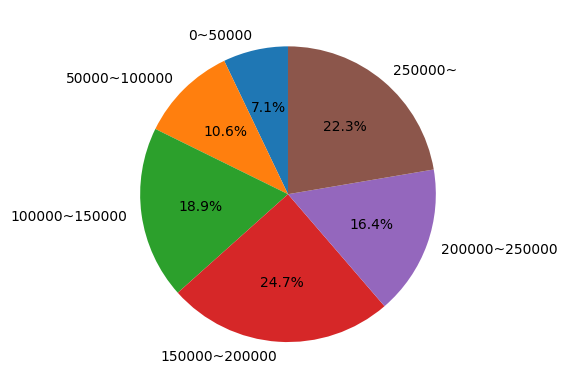

In [9]:
plt.pie(g_fnl0,labels=fnl_label,startangle=90,autopct="%1.1f%%")
plt.savefig('fnl_en0.jpg')#これによってグラフ化

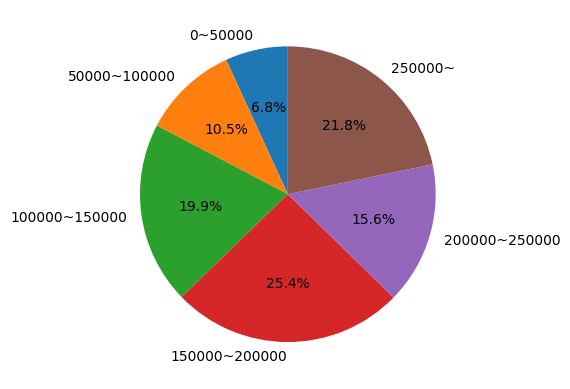

In [10]:
plt.pie(g_fnl1,labels=fnl_label,startangle=90,autopct="%1.1f%%")
plt.savefig('fnl_en1.jpg')#これによってグラフ化

C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2075555779.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_ed0[0]=a[a['education']==0][a['income']==0]['education'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2075555779.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_ed0[1]=a[a['education']==1][a['income']==0]['education'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2075555779.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_ed1[0]=a[a['education']==0][a['income']==1]['education'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2075555779.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_ed1[1]=a[a['education']==1][a['income']==1]['education'].count()


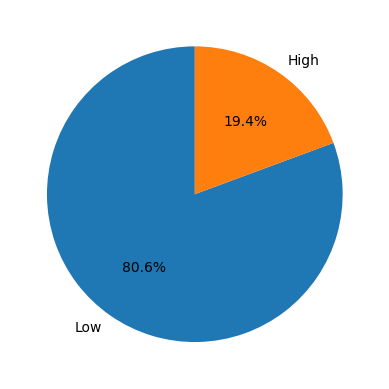

In [11]:
g_ed=np.array([0,0])
g_ed[0]=a[a['education']==0]['education'].count()
g_ed[1]=a[a['education']==1]['education'].count()
ed_label=['Low','High']
plt.pie(g_ed,labels=ed_label,startangle=90,autopct="%1.1f%%")
plt.savefig('ed_en.jpg')
g_ed0=np.array([0,0])
g_ed0[0]=a[a['education']==0][a['income']==0]['education'].count()
g_ed0[1]=a[a['education']==1][a['income']==0]['education'].count()
g_ed1=np.array([0,0])
g_ed1[0]=a[a['education']==0][a['income']==1]['education'].count()
g_ed1[1]=a[a['education']==1][a['income']==1]['education'].count()

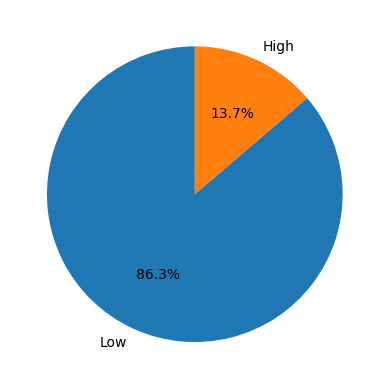

In [12]:
plt.pie(g_ed0,labels=ed_label,startangle=90,autopct="%1.1f%%")
plt.savefig('ed_en0.jpg')#これによってグラフ化

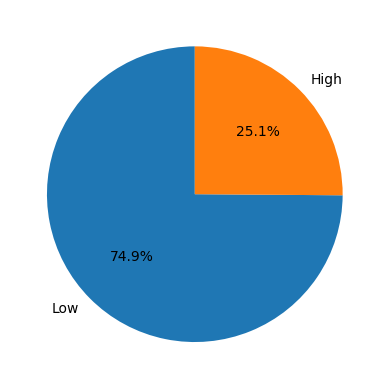

In [13]:
plt.pie(g_ed1,labels=ed_label,startangle=90,autopct="%1.1f%%")
plt.savefig('ed_en1.jpg')#これによってグラフ化

C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2736005477.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_edn[1]=a[a['education-num']>6][a['education-num']<=8]['education-num'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2736005477.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_edn[2]=a[a['education-num']>8][a['education-num']<=10]['education-num'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2736005477.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_edn[3]=a[a['education-num']>10][a['education-num']<=12]['education-num'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2736005477.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_edn[4]=a[a['education-num']>12][a['education-num']<=14]['education-num'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2736005477.py:14: UserWarning: Boolean Se

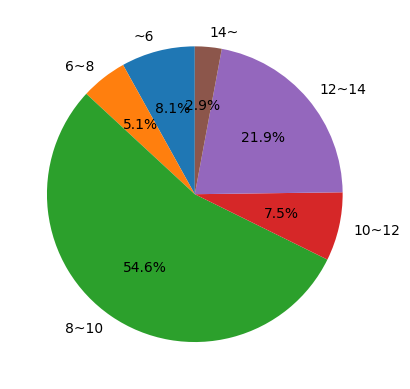

In [14]:
g_edn=np.array([0,0,0,0,0,0])
#教育年数を区間で分け、人数をカウントし、円グラフにする。
g_edn[0]=a[a['education-num']<=6]['education-num'].count()
g_edn[1]=a[a['education-num']>6][a['education-num']<=8]['education-num'].count()
g_edn[2]=a[a['education-num']>8][a['education-num']<=10]['education-num'].count()
g_edn[3]=a[a['education-num']>10][a['education-num']<=12]['education-num'].count()
g_edn[4]=a[a['education-num']>12][a['education-num']<=14]['education-num'].count()
g_edn[5]=a[a['education-num']>14]['education-num'].count()
edn_label=["~6","6~8","8~10","10~12","12~14","14~"]
plt.pie(g_edn,labels=edn_label,startangle=90,autopct="%1.1f%%")
plt.savefig('edn_en.jpg')#これによってグラフ化
#年齢の時と同様に、収入によって分けて円グラフ化する。
g_edn0=np.array([0,0,0,0,0,0])
g_edn0[0]=a[a['education-num']<=6][a['income']==0]['education-num'].count()
g_edn0[1]=a[a['education-num']>6][a['education-num']<=8][a['income']==0]['education-num'].count()
g_edn0[2]=a[a['education-num']>8][a['education-num']<=10][a['income']==0]['education-num'].count()
g_edn0[3]=a[a['education-num']>10][a['education-num']<=12][a['income']==0]['education-num'].count()
g_edn0[4]=a[a['education-num']>12][a['education-num']<=14][a['income']==0]['education-num'].count()
g_edn0[5]=a[a['education-num']>14][a['income']==0]['education-num'].count()
g_edn1=np.array([0,0,0,0,0,0])
g_edn1[0]=a[a['education-num']<=6][a['income']==1]['education-num'].count()
g_edn1[1]=a[a['education-num']>6][a['education-num']<=8][a['income']==1]['education-num'].count()
g_edn1[2]=a[a['education-num']>8][a['education-num']<=10][a['income']==1]['education-num'].count()
g_edn1[3]=a[a['education-num']>10][a['education-num']<=12][a['income']==1]['education-num'].count()
g_edn1[4]=a[a['education-num']>12][a['education-num']<=14][a['income']==1]['education-num'].count()
g_edn1[5]=a[a['education-num']>14][a['income']==1]['education-num'].count()

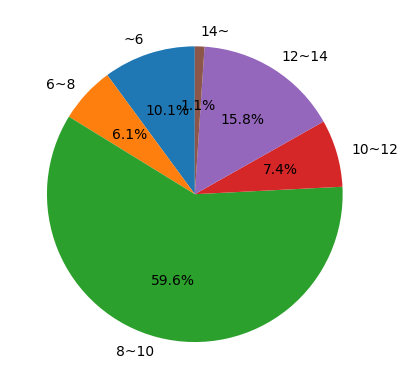

In [15]:
plt.pie(g_edn0,labels=edn_label,startangle=90,autopct="%1.1f%%")
plt.savefig('edn_en0.jpg')#これによってグラフ化

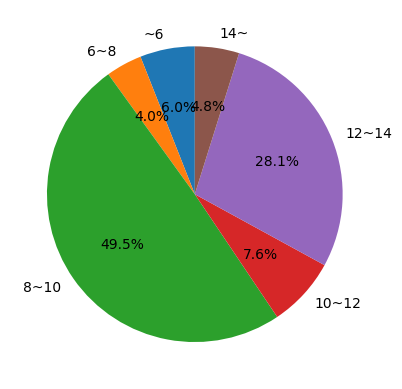

In [16]:
plt.pie(g_edn1,labels=edn_label,startangle=90,autopct="%1.1f%%")
plt.savefig('edn_en1.jpg')#これによってグラフ化

C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2992995798.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_mri0[0]=a[a['marital-status']==0][a['income']==0]['marital-status'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2992995798.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_mri0[1]=a[a['marital-status']==1][a['income']==0]['marital-status'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2992995798.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_mri1[0]=a[a['marital-status']==0][a['income']==1]['marital-status'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2992995798.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_mri1[1]=a[a['marital-status']==1][a['income']==1]['marital-status'].count()


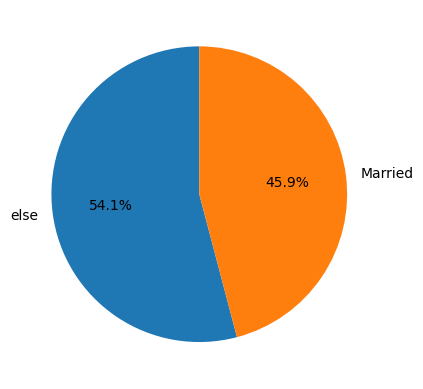

In [17]:
g_mri=np.array([0,0])
g_mri[0]=a[a['marital-status']==0]['marital-status'].count()
g_mri[1]=a[a['marital-status']==1]['marital-status'].count()
mri_label=['else','Married']
plt.pie(g_mri,labels=mri_label,startangle=90,autopct="%1.1f%%")
plt.savefig('mri_en.jpg')
g_mri0=np.array([0,0])
g_mri0[0]=a[a['marital-status']==0][a['income']==0]['marital-status'].count()
g_mri0[1]=a[a['marital-status']==1][a['income']==0]['marital-status'].count()
g_mri1=np.array([0,0])
g_mri1[0]=a[a['marital-status']==0][a['income']==1]['marital-status'].count()
g_mri1[1]=a[a['marital-status']==1][a['income']==1]['marital-status'].count()

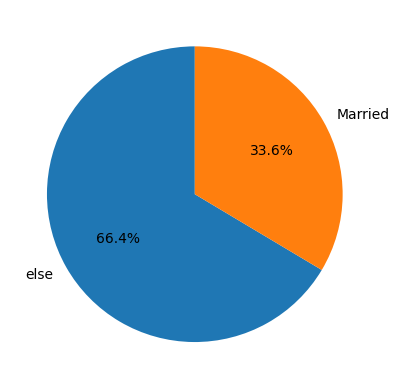

In [18]:
plt.pie(g_mri0,labels=mri_label,startangle=90,autopct="%1.1f%%")
plt.savefig('mri_en0.jpg')#これによってグラフ化

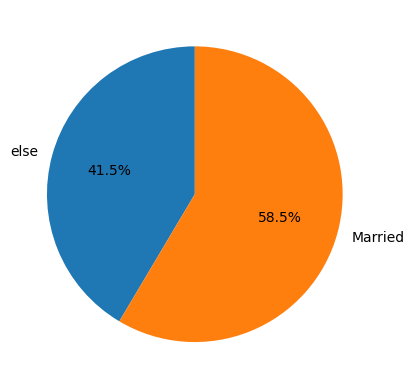

In [19]:
plt.pie(g_mri1,labels=mri_label,startangle=90,autopct="%1.1f%%")
plt.savefig('mri_en1.jpg')#これによってグラフ化

C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\3748463262.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_sex0[0]=a[a['sex']==0][a['income']==0]['sex'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\3748463262.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_sex0[1]=a[a['sex']==1][a['income']==0]['sex'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\3748463262.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_sex1[0]=a[a['sex']==0][a['income']==1]['sex'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\3748463262.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_sex1[1]=a[a['sex']==1][a['income']==1]['sex'].count()


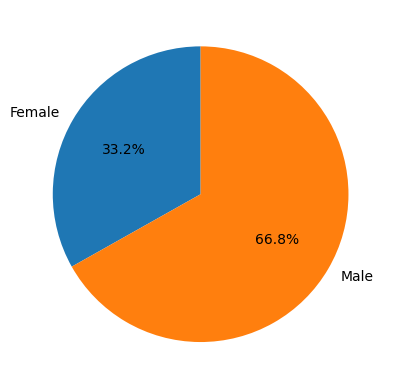

In [20]:
g_sex=np.array([0,0])
g_sex[0]=a[a['sex']==0]['sex'].count()
g_sex[1]=a[a['sex']==1]['sex'].count()
sex_label=['Female','Male']
plt.pie(g_sex,labels=sex_label,startangle=90,autopct="%1.1f%%")
plt.savefig('sex_en.jpg')
g_sex0=np.array([0,0])
g_sex0[0]=a[a['sex']==0][a['income']==0]['sex'].count()
g_sex0[1]=a[a['sex']==1][a['income']==0]['sex'].count()
g_sex1=np.array([0,0])
g_sex1[0]=a[a['sex']==0][a['income']==1]['sex'].count()
g_sex1[1]=a[a['sex']==1][a['income']==1]['sex'].count()

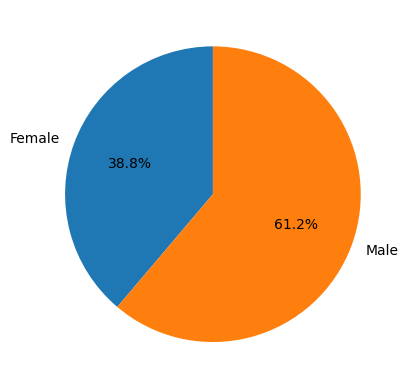

In [21]:
plt.pie(g_sex0,labels=sex_label,startangle=90,autopct="%1.1f%%")
plt.savefig('sex_en0.jpg')#これによってグラフ化

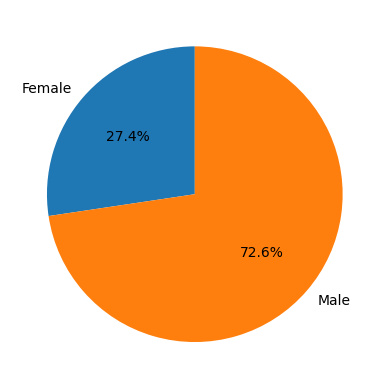

In [22]:
plt.pie(g_sex1,labels=sex_label,startangle=90,autopct="%1.1f%%")
plt.savefig('sex_en1.jpg')#これによってグラフ化

C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\3535397402.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_cag0[0]=a[a['capital-gain']==0][a['income']==0]['capital-gain'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\3535397402.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_cag0[1]=a[a['capital-gain']!=0][a['income']==0]['capital-gain'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\3535397402.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_cag1[0]=a[a['capital-gain']==0][a['income']==1]['capital-gain'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\3535397402.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_cag1[1]=a[a['capital-gain']!=0][a['income']==1]['capital-gain'].count()


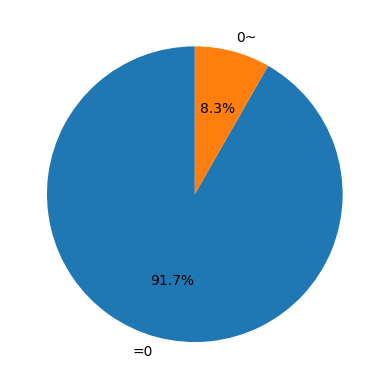

In [23]:
g_cag=np.array([0,0])
g_cag[0]=a[a['capital-gain']==0]['capital-gain'].count()
g_cag[1]=a[a['capital-gain']!=0]['capital-gain'].count()
cag_label=['=0','0~']
plt.pie(g_cag,labels=cag_label,startangle=90,autopct="%1.1f%%")
plt.savefig('cag_en.jpg')
g_cag0=np.array([0,0])
g_cag0[0]=a[a['capital-gain']==0][a['income']==0]['capital-gain'].count()
g_cag0[1]=a[a['capital-gain']!=0][a['income']==0]['capital-gain'].count()
g_cag1=np.array([0,0])
g_cag1[0]=a[a['capital-gain']==0][a['income']==1]['capital-gain'].count()
g_cag1[1]=a[a['capital-gain']!=0][a['income']==1]['capital-gain'].count()

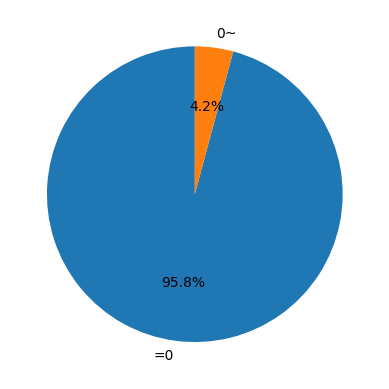

In [24]:
plt.pie(g_cag0,labels=cag_label,startangle=90,autopct="%1.1f%%")
plt.savefig('cag_en0.jpg')#これによってグラフ化

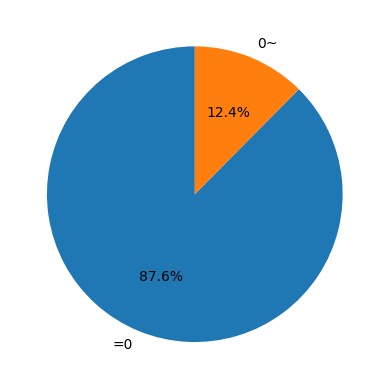

In [25]:
plt.pie(g_cag1,labels=cag_label,startangle=90,autopct="%1.1f%%")
plt.savefig('cag_en1.jpg')#これによってグラフ化

C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\4112486967.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_cal0[0]=a[a['capital-loss']==0][a['income']==0]['capital-loss'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\4112486967.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_cal0[1]=a[a['capital-loss']!=0][a['income']==0]['capital-loss'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\4112486967.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_cal1[0]=a[a['capital-loss']==0][a['income']==1]['capital-loss'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\4112486967.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_cal1[1]=a[a['capital-loss']!=0][a['income']==1]['capital-loss'].count()


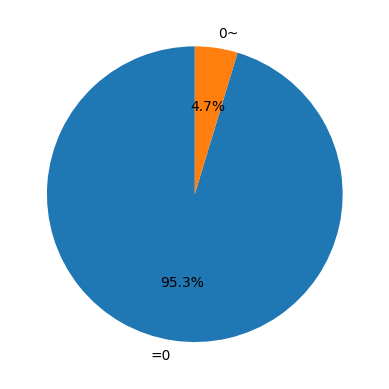

In [26]:
g_cal=np.array([0,0])
g_cal[0]=a[a['capital-loss']==0]['capital-loss'].count()
g_cal[1]=a[a['capital-loss']!=0]['capital-loss'].count()
cal_label=['=0','0~']
plt.pie(g_cal,labels=cal_label,startangle=90,autopct="%1.1f%%")
plt.savefig('cal_en.jpg')
g_cal0=np.array([0,0])
g_cal0[0]=a[a['capital-loss']==0][a['income']==0]['capital-loss'].count()
g_cal0[1]=a[a['capital-loss']!=0][a['income']==0]['capital-loss'].count()
g_cal1=np.array([0,0])
g_cal1[0]=a[a['capital-loss']==0][a['income']==1]['capital-loss'].count()
g_cal1[1]=a[a['capital-loss']!=0][a['income']==1]['capital-loss'].count()

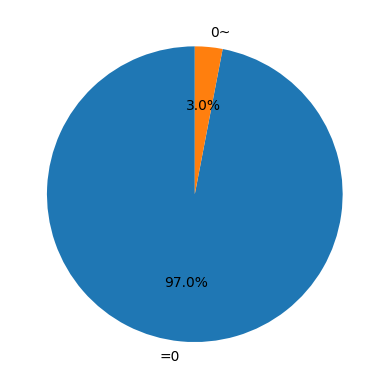

In [27]:
plt.pie(g_cal0,labels=cal_label,startangle=90,autopct="%1.1f%%")
plt.savefig('cal_en0.jpg')#これによってグラフ化

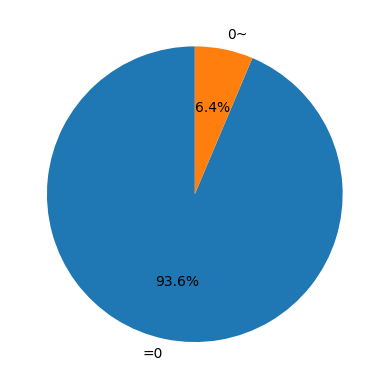

In [28]:
plt.pie(g_cal1,labels=cal_label,startangle=90,autopct="%1.1f%%")
plt.savefig('cal_en1.jpg')#これによってグラフ化

C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2264480433.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_hpw0[0]=a[a['hours-per-week']<40][a['income']==0]['hours-per-week'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2264480433.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_hpw0[1]=a[a['hours-per-week']==40][a['income']==0]['hours-per-week'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2264480433.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_hpw0[2]=a[a['hours-per-week']>40][a['income']==0]['hours-per-week'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2264480433.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_hpw1[0]=a[a['hours-per-week']<40][a['income']==1]['hours-per-week'].count()
C:\Users\yusuk\AppData\Local\Temp\ipykernel_28208\2264480433.py:14: UserWarning: Boolean Series key will

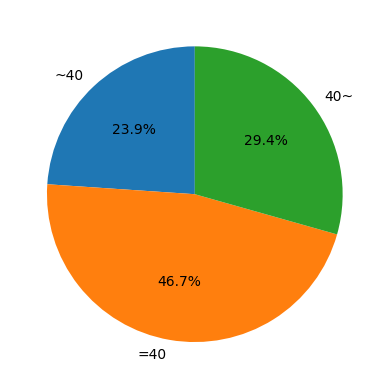

In [29]:
g_hpw=np.array([0,0,0])
g_hpw[0]=a[a['hours-per-week']<40]['hours-per-week'].count()
g_hpw[1]=a[a['hours-per-week']==40]['hours-per-week'].count()
g_hpw[2]=a[a['hours-per-week']>40]['hours-per-week'].count()
hpw_label=['~40','=40','40~']
plt.pie(g_hpw,labels=hpw_label,startangle=90,autopct="%1.1f%%")
plt.savefig('hpw_en.jpg')
g_hpw0=np.array([0,0,0])
g_hpw0[0]=a[a['hours-per-week']<40][a['income']==0]['hours-per-week'].count()
g_hpw0[1]=a[a['hours-per-week']==40][a['income']==0]['hours-per-week'].count()
g_hpw0[2]=a[a['hours-per-week']>40][a['income']==0]['hours-per-week'].count()
g_hpw1=np.array([0,0,0])
g_hpw1[0]=a[a['hours-per-week']<40][a['income']==1]['hours-per-week'].count()
g_hpw1[1]=a[a['hours-per-week']==40][a['income']==1]['hours-per-week'].count()
g_hpw1[2]=a[a['hours-per-week']>40][a['income']==1]['hours-per-week'].count()

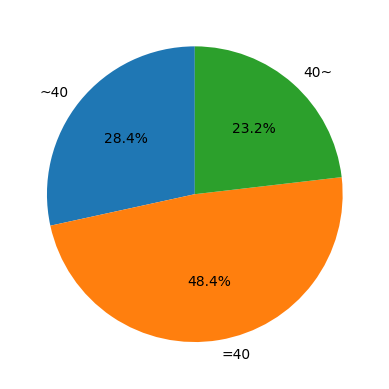

In [30]:
plt.pie(g_hpw0,labels=hpw_label,startangle=90,autopct="%1.1f%%")
plt.savefig('hpw_en0.jpg')#これによってグラフ化

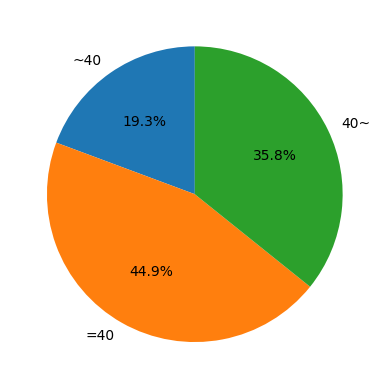

In [31]:
plt.pie(g_hpw1,labels=hpw_label,startangle=90,autopct="%1.1f%%")
plt.savefig('hpw_en1.jpg')#これによってグラフ化

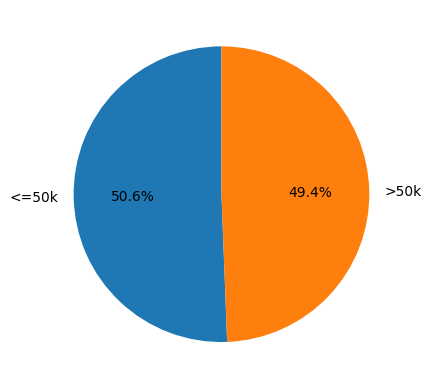

In [32]:
g_in=np.array([0,0])
g_in[0]=a[a['income']==0]['income'].count()
g_in[1]=a[a['income']==1]['income'].count()
in_label=['<=50k','>50k']
plt.pie(g_in,labels=in_label,startangle=90,autopct="%1.1f%%")
plt.savefig('in_en.jpg')

In [4]:
from ydata_profiling import ProfileReport
profile = ProfileReport(a, title="Profiling Report")
profile.to_notebook_iframe()
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

In [6]:
# データを訓練データとテストデータに分割
X = a[["age","fnlwgt","education","education-num","marital-status","sex","capital-gain","capital-loss","hours-per-week"]]
X = pd.get_dummies(X, drop_first=True)#ダミー変数にコンバート
y = a['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)

# ロジスティック回帰モデルの初期化
model = LogisticRegression(max_iter=300000)

# モデルの訓練
model.fit(X_train, y_train)

# テストデータを使って予測
y_pred = model.predict(X_test)

# 分類結果の評価　自分で行った際はaccuracy　0.65であった。
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      2472
           1       0.65      0.62      0.64      2413

    accuracy                           0.65      4885
   macro avg       0.65      0.65      0.65      4885
weighted avg       0.65      0.65      0.65      4885

[[1663  809]
 [ 912 1501]]


In [7]:
clf = MLPClassifier(random_state=7,power_t=0.01,max_iter=1000,batch_size=100).fit(X_train, y_train)
#Relu関数を活性化関数とした学習を行った。その詳細はこのコードにより表示。
clf.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 100,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.01,
 'random_state': 7,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [8]:
clf.score(X_test, y_test)

0.5377686796315251

In [9]:
#正規化する。
from sklearn.preprocessing import MinMaxScaler
 
#正規化のクラスを準備
ms = MinMaxScaler()
 
#特徴量の最大値と最小値を計算し変換
a1 = ms.fit_transform(a)

In [10]:
#正規化によってすべてのデータが0～1になった
print(a[1:2])
print(a1[1])

   age  fnlwgt  education  education-num  marital-status  sex  capital-gain  \
1   50   83311          1             13               1    1             0   

   capital-loss  hours-per-week  income  
1             0              13       0  
[0.45205479 0.04805174 1.         0.8        1.         1.
 0.         0.         0.12244898 0.        ]


In [11]:
X1=a1[:,0:8]
y1=a1[:,9]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, random_state=7)

In [12]:
clf1 = MLPClassifier(random_state=7,power_t=0.01,max_iter=1000,batch_size=100).fit(X1_train, y1_train)
#Relu関数を活性化関数とした学習を行った。その詳細はこのコードにより表示。
clf1.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 100,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.01,
 'random_state': 7,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [14]:
clf1.score(X1_test,y1_test)

0.6548618219037871

In [13]:
#Wordで記述したように、データのうち、性質が異なる三つを除いた、"age","education","education-num","marital-status","sex","hours-per-week"のみ用いて正規化。
a2=a.loc[:,["age","education","education-num","marital-status","sex","hours-per-week","income"]]

In [23]:
#特徴量の最大値と最小値を計算し変換
a3 = ms.fit_transform(a2)

In [65]:
X2=a3[:,0:6]
y2=a3[:,6]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, random_state=7)

In [66]:
clf2 = MLPClassifier(random_state=7,power_t=0.01,max_iter=1000,batch_size=100).fit(X2_train, y2_train)
#Relu関数を活性化関数とした学習を行った。その詳細はこのコードにより表示。
clf2.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 100,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.01,
 'random_state': 7,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [67]:
clf2.score(X2_test, y2_test)

0.651381780962129

In [ ]:
#以下はwordの以降のコードに対応
#以下教科書のコードの必要部分を切り取って必要部分のみ抜き出し、使ってみたが、おそらく更新がうまくいっていない

In [15]:
def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


In [16]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

class Affine:
    def __init__(self, W, b):
        self.W =W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 重み・バイアスパラメータの微分
        self.dW = None
        self.db = None

    def forward(self, x):
        # テンソル対応
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x
        
        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 入力データの形状に戻す（テンソル対応）
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None # softmaxの出力
        self.t = None # 教師データ

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 教師データがone-hot-vectorの場合
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx

class SGD:
    def __init__(self,lr):
        self.name="SGD"
        self.lr=lr
    def update(self,params,grads):
        for key in params.key():
            params[key]-=self.lr * grads[key]

In [17]:
from collections import OrderedDict
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
    # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)
        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : 
            t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        return grads

In [18]:
network=TwoLayerNet(6,100,2)

In [31]:
X2=a2.loc[0:300,["age","education","education-num","marital-status","sex","hours-per-week"]]
y2=a2.loc[0:300,["income"]]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, random_state=7)
x_train,t_train,x_test, t_test =X2_train.to_numpy(), y2_train.to_numpy(), X2_test.to_numpy(), y2_test.to_numpy()

2365.8561790776143


In [25]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    params = network.params
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

1.0 1.0


In [ ]:
#以下初期考えていたもの

In [18]:
class ReLU:
    def __call__(self, x):
        self.x = x # 逆伝播で使うので変数に保存
        return np.maximum(0, x) # 0より大きければx、小さければ0

    def backward(self, d):
        return d * (self.x > 0) # xが0より大きければ傾き1、小さけれ0にする

    def update(self, lr):
        pass

In [19]:
class Linear:
    def __init__(self, n_input, n_output):
        self.w = np.random.normal(size=(n_input, n_output), scale=(2/n_output)**0.5)
        self.b = np.random.randn(n_output)

    def __call__(self, x):
        self.x = x
        return np.dot(x, self.w) + self.b

    def backward(self, d):
        self.grad_w = np.multiply(*np.meshgrid(d, self.x))
        self.grad_b = d
        return np.dot(d, self.w.T)

    def update(self, lr):
        self.w -= lr * self.grad_w
        self.b -= lr * self.grad_b

In [20]:
class RSS:
    def __call__(self, y, t):
        self.y = y
        self.t = t
        return np.sum((y - t) ** 2) / 2

    def backward(self):
        return self.y - self.t

In [34]:
def train(model, x, y, criterion, lr, n_epochs):
    for epoch in range(1, n_epochs+1):
        loss = 0
        for _ in range(len(x)):
            # ランダムに一つ抽出
            idx = np.random.randint(0, len(x))
            sample_x = x[idx]
            sample_y = y[idx]

            out = model(sample_x) # 順伝播
            loss += criterion(out, sample_y) # 損失の計算
            d = criterion.backward() # 損失関数の逆伝播
            model.backward(d) # ニューラルネットワークの逆伝播
            model.update(lr) # パラメータの更新
        print(f'{epoch}epoch loss:{loss / len(x)}')

In [35]:
class NeuralNetwork:
    def __init__(self, *layers):
        self.layers = layers

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def backward(self, d):
        for layer in self.layers[::-1]:
            d = layer.backward(d)

    def update(self, lr):
        for layer in self.layers:
            layer.update(lr)

In [40]:
class CrossEntropy:
    def __call__(self, y, t):
        y = self._softmax(y)
        self.y = y
        self.t = t
        loss = -np.sum(t * np.log(y))
        return loss

    def backward(self):
        return self.y - self.t

    def _softmax(self, y):
        return np.exp(y) / np.sum(np.exp(y))


In [36]:
X2=a3[:,0:6]
y2=a2.loc[:,['income']].to_numpy()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, random_state=7)
x_train,y_train,x_test, y_test =X2_train, y2_train, X2_test, y2_test

In [37]:
y_train = np.eye(2)[y_train]
y_test = np.eye(2)[y_test]

In [44]:
nn = NeuralNetwork(
    Linear(6, 100),
    ReLU(),
    Linear(100,50),
    ReLU(),
    Linear(50, 2),
)


In [45]:
train(nn, x_train, y_train, CrossEntropy(), 0.001, 5)

ValueError: non-broadcastable output operand with shape (5,) doesn't match the broadcast shape (1,5)

In [ ]:
print("OK")